# 1. Gerar Dados Assimétricos

dados assimétricos positivamente usando a distribuição log-normal.

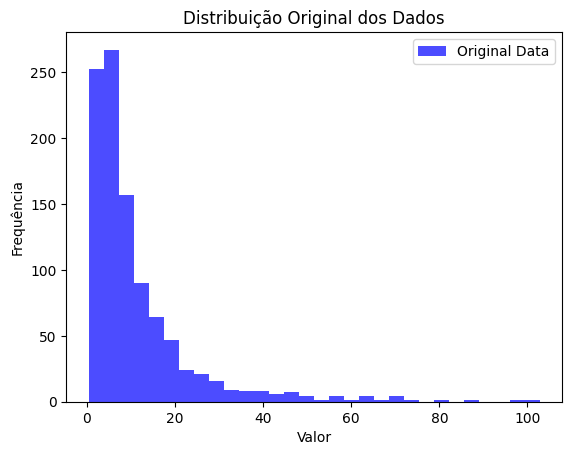

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, lognorm, shapiro

# Gerar dados com distribuição log-normal
np.random.seed(0)  # Para reprodutibilidade
data = lognorm.rvs(s=0.954, scale=np.exp(2), size=1000)

# Visualizar a distribuição original dos dados
plt.hist(data, bins=30, alpha=0.7, color='blue', label='Original Data')
plt.title('Distribuição Original dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [4]:
# Teste de normalidade Shapiro-Wilk
stat, p_value = shapiro(data)

print(f"Shapiro-Wilk Statistic: {stat:.3f}, P-value: {p_value:.3f}")

# Interpretar o resultado
alpha = 0.05
if p_value > alpha:
    print('A amostra parece ser proveniente de uma distribuição normal (falha em rejeitar H0)')
else:
    print('A amostra não parece ser proveniente de uma distribuição normal (rejeitar H0)')

Shapiro-Wilk Statistic: 0.684, P-value: 0.000
A amostra não parece ser proveniente de uma distribuição normal (rejeitar H0)


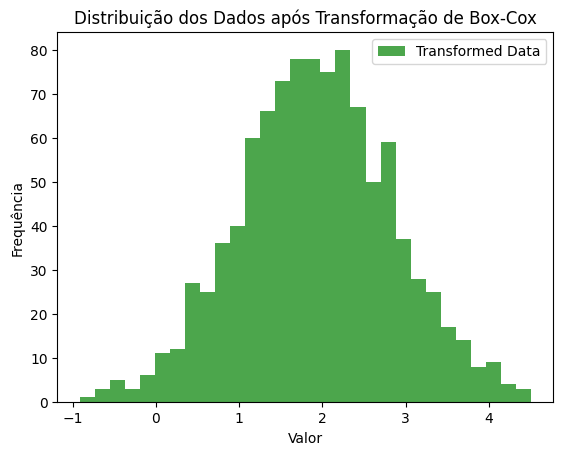

Lambda ótimo encontrado pela transformação de Box-Cox: -0.012


In [2]:
# Aplicar transformação de Box-Cox
data_transformed, best_lambda = boxcox(data)

# Visualizar a distribuição dos dados transformados
plt.hist(data_transformed, bins=30, alpha=0.7, color='green', label='Transformed Data')
plt.title('Distribuição dos Dados após Transformação de Box-Cox')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.show()

print(f"Lambda ótimo encontrado pela transformação de Box-Cox: {best_lambda:.3f}")


In [5]:
# Teste de normalidade Shapiro-Wilk
stat, p_value = shapiro(data_transformed)

print(f"Shapiro-Wilk Statistic: {stat:.3f}, P-value: {p_value:.3f}")

# Interpretar o resultado
alpha = 0.05
if p_value > alpha:
    print('A amostra parece ser proveniente de uma distribuição normal (falha em rejeitar H0)')
else:
    print('A amostra não parece ser proveniente de uma distribuição normal (rejeitar H0)')


Shapiro-Wilk Statistic: 0.999, P-value: 0.644
A amostra parece ser proveniente de uma distribuição normal (falha em rejeitar H0)


In [6]:
# Tranformação inversa

Variância dos dados originais: 154.889
Variância dos dados transformados: 0.846
Variância após reconstrução: 154.889


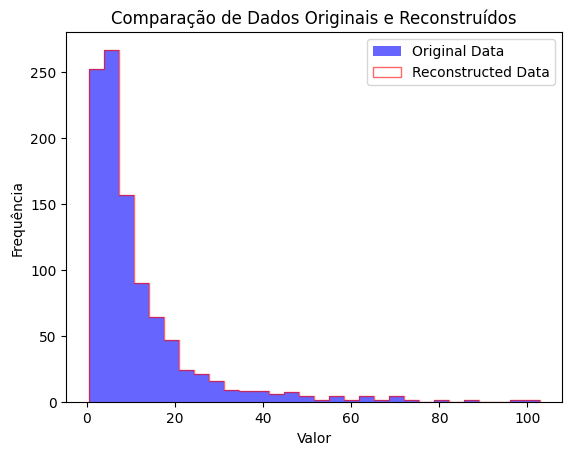

In [7]:
def boxcox_inverse(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lambda_ * y + 1) / lambda_)

# Aplicando a inversa da transformação de Box-Cox
data_original_reconstructed = boxcox_inverse(data_transformed, best_lambda)

# Comparando as métricas de dispersão antes e depois da transformação e da inversão
original_variance = np.var(data, ddof=1)
transformed_variance = np.var(data_transformed, ddof=1)
reconstructed_variance = np.var(data_original_reconstructed, ddof=1)

print(f"Variância dos dados originais: {original_variance:.3f}")
print(f"Variância dos dados transformados: {transformed_variance:.3f}")
print(f"Variância após reconstrução: {reconstructed_variance:.3f}")

# Visualizando os dados reconstruídos comparados aos dados originais
plt.hist(data, bins=30, alpha=0.6, color='blue', label='Original Data')
plt.hist(data_original_reconstructed, bins=30, alpha=0.6, color='red', label='Reconstructed Data', histtype='step')
plt.title('Comparação de Dados Originais e Reconstruídos')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend()
plt.show()
